# TP 2

First of all, install collatex and levenshtein packages in your python environment

(For levenstein distance see: [wikipedia Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance))

In [1]:
!pip install --upgrade collatex
!pip install levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.3/92.3 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for collatex: filename=collatex-2.3-py2.py3-none-any.whl size=69999 sha256=f549f560c0cbddbe9f4b9ccb1358bbe2dacc93618550cb0a909e221520ebf23f
  Stored in directory: /root/.cache/pip/wheels/90/e1/c8/ec5f5a3da4237bd5755d435017dd1d32304191018d1b6f9946
Successfully built collatex
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.3 MB/s eta 0:00:00


Tell python you want to use collatex

In [2]:
from collatex import *

Create an object that will contain you collation (`collation` is an arbitrary variable name)


In [3]:
collation = Collation()

Add witnesses to you object `collation`

In [4]:
collation.add_plain_witness( "A", "The quick brown fox jumped over the lazy dog.")
collation.add_plain_witness( "B", "The brown fox jumped over the dog." )
collation.add_plain_witness( "C", "The bad fox jumped over the lazy dog." )

And now let collatex do the collation for you. We store the collation in the variable `alignment_table` and we just have to `print`the variable.

In [5]:
alignment_table = collate(collation)
print(alignment_table)

+---+-----+-------+-------+---------------------+------+------+
| A | The | quick | brown | fox jumped over the | lazy | dog. |
| B | The | -     | brown | fox jumped over the | -    | dog. |
| C | The | bad   | -     | fox jumped over the | lazy | dog. |
+---+-----+-------+-------+---------------------+------+------+


The collate function take different arguments.

# 1. Parameters

## 1.1. Segmentation
The segmentation parameter determines whether each token is output separately (`False`) or whether the similar adjacent tokens are merged.

In the preceding example, "fox jumped over the" are merged in a unique cell. To make the results easier to read, you may want to use just one word per cell.

Let's try to add the parameter `segmentation=False`.

In [6]:
alignment_table = collate(collation, segmentation=False)
print(alignment_table)

+---+-----+-------+-------+-----+--------+------+-----+------+-----+---+
| A | The | quick | brown | fox | jumped | over | the | lazy | dog | . |
| B | The | -     | brown | fox | jumped | over | the | -    | dog | . |
| C | The | bad   | -     | fox | jumped | over | the | lazy | dog | . |
+---+-----+-------+-------+-----+--------+------+-----+------+-----+---+


## 1.2. Near Match
The Near match parameter controls the behavior of CollateX Python in some situations where no exact alignment is possible because there is neither string-equality nor a forced-match environment.

Consider:

In [7]:
collation = Collation()
collation.add_plain_witness("A", "The big gray koala")
collation.add_plain_witness("B", "The grey koala")
alignment_table = collate(collation, segmentation=False)
print(alignment_table)

+---+-----+------+------+-------+
| A | The | big  | gray | koala |
| B | The | grey | -    | koala |
+---+-----+------+------+-------+


Because “gray” and “grey” are not string-equal, CollateX Python does not know to align them, which means that it does not know whether “grey” in Witness B should be aligned with “big” or with “gray” in witness A. In situations like this, CollateX Python always chooses the leftmost option, which means that in this case it aligns “grey” with “big”, rather than with “gray”.

Let's try now with the Near Match paramater on True:

In [8]:
alignment_table = collate(collation, segmentation=False, near_match=True)
print(alignment_table)

+---+-----+-----+------+-------+
| A | The | big | gray | koala |
| B | The | -   | grey | koala |
+---+-----+-----+------+-------+


The "closest" alignement is defined in collatex on the basis of levenshtein distance (i.e. the number of modification you need to transform a word_1 into a word_2)

## 1.3. Layout
The Layout parameter allow you to chose between `vertical` or `horizontal` alignment.

Try to display the above alignment table verticaly.

In [9]:
alignment_table = collate(collation, segmentation=False, layout='vertical')
print(alignment_table)

+-------+-------+
|   A   |   B   |
+-------+-------+
|  The  |  The  |
+-------+-------+
|  big  |  grey |
+-------+-------+
|  gray |   -   |
+-------+-------+
| koala | koala |
+-------+-------+


## 1.4. Output
Now let's look at the different output options for your table.
By default, CollateX outputs an ASCII table.

### 1.4.1. html
You can export your result in html format.

In [10]:
collation = Collation()
collation.add_plain_witness( "MS_A", "The quick brown fox jumped over the lazy dog.")
collation.add_plain_witness( "MS_B", "The brown fox jumped over the dog." )
collation.add_plain_witness( "MS_C", "The bad fox jumped over the lazy dog." )
alignment_table = collate(collation, output='html', layout='vertical', segmentation=False)

MS_A,MS_B,MS_C
The,The,The
quick,-,bad
brown,brown,-
fox,fox,fox
jumped,jumped,jumped
over,over,over
the,the,the
lazy,-,lazy
dog,dog,dog
.,.,.


the `html2`provide a more readable output with colored lines (cyan = same, red = variant)

In [11]:
alignment_table = collate(collation, output='html2', layout='vertical', segmentation=False)

### 1.4.2. Graph
Your result may also be displayed as a beautiful graph with the two parameters `svg` and `svg_simple`.

Try both of them

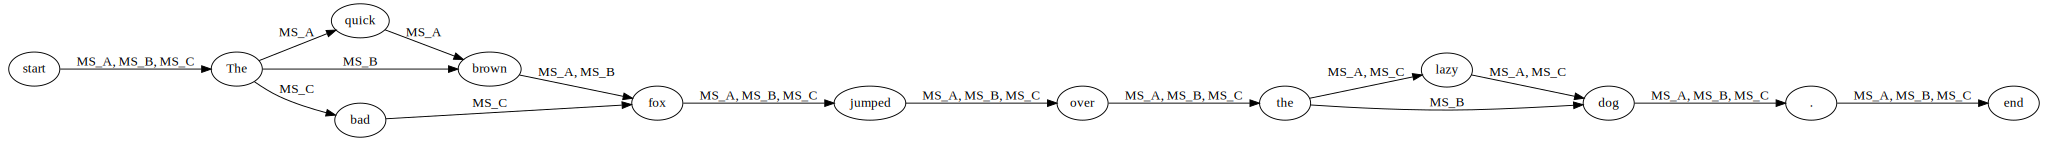

In [12]:
alignment_table = collate(collation, output='svg_simple', segmentation=False)

### 1.4.3. csv
You may want to have it ready in `csv` to compute them in a more complex workflow, for example, to add lemmatization and morphological analysis using `spacy` or `bert` model or just to open your enormous table into excel or google sheet.

Try now the `output='csv'` parameter

In [15]:
alignment_table = collate(collation, output='csv', segmentation=False)
print(alignment_table)

MS_A,The ,quick ,brown ,fox ,jumped ,over ,the ,lazy ,dog,.
MS_B,The ,,brown ,fox ,jumped ,over ,the ,,dog,.
MS_C,The ,bad ,,fox ,jumped ,over ,the ,lazy ,dog,.



Enregistrer le fichier csv sur votre disque

In [16]:
# Save the CSV string to a file
with open('alignment_table.csv', 'w') as f:
  f.write(alignment_table)

### 1.4.4. XML / XML TEI
you may also want to export the result in XML

In [31]:
alignment_table = collate(collation, output='tei', segmentation=False, indent=True)
print(alignment_table)

<?xml version="1.0" ?>
<cx:apparatus xmlns:cx="http://interedition.eu/collatex/ns/1.0" xmlns="http://www.tei-c.org/ns/1.0">
	The
	 
	<app>
		<rdg wit="#MS_A">quick</rdg>
		<rdg wit="#MS_C">bad</rdg>
	</app>
	 
	<app>
		<rdg wit="#MS_A #MS_B">brown</rdg>
	</app>
	 
	fox
	 
	jumped
	 
	over
	 
	the
	 
	<app>
		<rdg wit="#MS_A #MS_C">lazy</rdg>
	</app>
	 
	dog
	.
</cx:apparatus>



(to beautifully display your xml, you may use beautifulsoup...)

In [24]:
from bs4 import BeautifulSoup

bs = BeautifulSoup(alignment_table, 'xml')
print(bs.prettify())


<?xml version="1.0" encoding="utf-8"?>
<cx:apparatus xmlns="http://www.tei-c.org/ns/1.0" xmlns:cx="http://interedition.eu/collatex/ns/1.0">
 The
 <app>
  <rdg wit="#MS_A">
   quick
  </rdg>
  <rdg wit="#MS_C">
   bad
  </rdg>
 </app>
 <app>
  <rdg wit="#MS_A #MS_B">
   brown
  </rdg>
 </app>
 fox
	 
	jumped
	 
	over
	 
	the
 <app>
  <rdg wit="#MS_A #MS_C">
   lazy
  </rdg>
 </app>
 dog
	.
</cx:apparatus>



Et hop! Votre apparat critique en XML TEI est fait sans noeuds au cerveau :-)

### 1.4.5. JSON
And finally you can also export your allignment table into JSON format. This is the most complete output format, and therefore a common choice for subsequent preprocessing.

In [25]:
alignment_table = collate(collation, output='json', segmentation=False, indent=True)
print(alignment_table)

{"table": [[[{"_sigil": "MS_A", "_token_array_position": 0, "n": "The", "t": "The "}], [{"_sigil": "MS_A", "_token_array_position": 1, "n": "quick", "t": "quick "}], [{"_sigil": "MS_A", "_token_array_position": 2, "n": "brown", "t": "brown "}], [{"_sigil": "MS_A", "_token_array_position": 3, "n": "fox", "t": "fox "}], [{"_sigil": "MS_A", "_token_array_position": 4, "n": "jumped", "t": "jumped "}], [{"_sigil": "MS_A", "_token_array_position": 5, "n": "over", "t": "over "}], [{"_sigil": "MS_A", "_token_array_position": 6, "n": "the", "t": "the "}], [{"_sigil": "MS_A", "_token_array_position": 7, "n": "lazy", "t": "lazy "}], [{"_sigil": "MS_A", "_token_array_position": 8, "n": "dog", "t": "dog"}], [{"_sigil": "MS_A", "_token_array_position": 9, "n": ".", "t": "."}]], [[{"_sigil": "MS_B", "_token_array_position": 11, "n": "The", "t": "The "}], null, [{"_sigil": "MS_B", "_token_array_position": 12, "n": "brown", "t": "brown "}], [{"_sigil": "MS_B", "_token_array_position": 13, "n": "fox", "

In [27]:
import json
parsed = json.loads(alignment_table)
print(json.dumps(parsed, indent=4))


{
    "table": [
        [
            [
                {
                    "_sigil": "MS_A",
                    "_token_array_position": 0,
                    "n": "The",
                    "t": "The "
                }
            ],
            [
                {
                    "_sigil": "MS_A",
                    "_token_array_position": 1,
                    "n": "quick",
                    "t": "quick "
                }
            ],
            [
                {
                    "_sigil": "MS_A",
                    "_token_array_position": 2,
                    "n": "brown",
                    "t": "brown "
                }
            ],
            [
                {
                    "_sigil": "MS_A",
                    "_token_array_position": 3,
                    "n": "fox",
                    "t": "fox "
                }
            ],
            [
                {
                    "_sigil": "MS_A",
                    "_token_array_p